In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [27]:
# Load the provided CSV file to examine its contents
data_path = ('C:\\Users\\Jozweh\\Desktop\\Fintech\\HistoricalData_5Y.csv')
fx_data = pd.read_csv(data_path)



In [29]:
# Display the first few rows of the dataset and its summary information
fx_data.head(), fx_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1525 non-null   object 
 1   Close/Last  1525 non-null   float64
 2   Volume      0 non-null      float64
 3   Open        1525 non-null   float64
 4   High        1525 non-null   float64
 5   Low         1525 non-null   float64
dtypes: float64(5), object(1)
memory usage: 71.6+ KB


(         Date  Close/Last  Volume    Open    High     Low
 0  04/30/2024      1.0656     NaN  1.0665  1.0674  1.0655
 1  04/29/2024      1.0703     NaN  1.0719  1.0724  1.0703
 2  04/28/2024      1.0716     NaN  1.0692  1.0720  1.0692
 3  04/26/2024      1.0694     NaN  1.0729  1.0753  1.0674
 4  04/25/2024      1.0722     NaN  1.0729  1.0732  1.0718,
 None)

In [31]:
# Convert 'Date' to datetime and set it as index
fx_data['Date'] = pd.to_datetime(fx_data['Date'])
fx_data.set_index('Date', inplace=True)

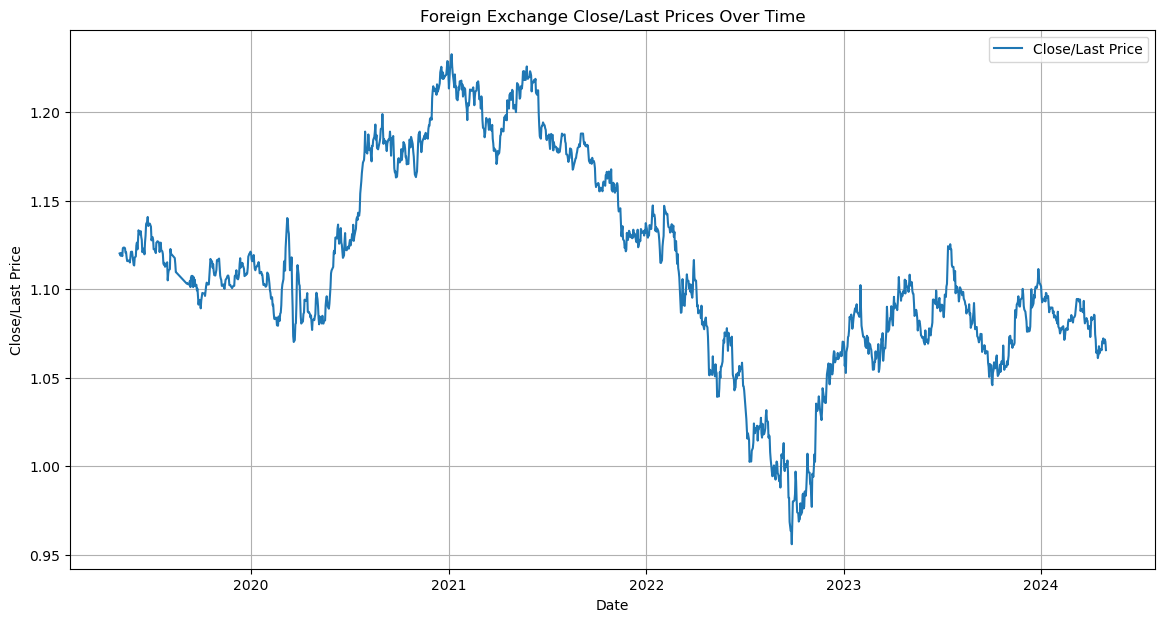

In [6]:
# Plotting the 'Close/Last' price to visualize trends and patterns
plt.figure(figsize=(14, 7))
plt.plot(fx_data['Close/Last'], label='Close/Last Price')
plt.title('Foreign Exchange Close/Last Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Calculate mean and standard deviation of daily returns
mean_return = daily_returns.mean()
std_dev_return = daily_returns.std()

mean_return, std_dev_return


NameError: name 'daily_returns' is not defined

In [ ]:
# Calculate the average and median projections for each day across all simulations
average_projections = np.mean(simulation_results, axis=0)
median_projections = np.median(simulation_results, axis=0)

In [ ]:
# Plotting the average and median projections
plt.figure(figsize=(14, 7))
plt.plot(average_projections, label='Average Projection', color='red')
plt.plot(median_projections, label='Median Projection', color='green')
plt.title('Average and Median Projections of Foreign Exchange Rates')
plt.xlabel('Days')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Calculate daily returns if not in the dataframe already
if 'Daily Returns' not in fx_data.columns:
    fx_data['Daily Returns'] = fx_data['Close/Last'].pct_change().fillna(0)

In [ ]:
# Step 2: Set up Monte Carlo simulation parameters
nSim = 1000  # Default number of simulations
num_days = 250  # Number of days to simulate

In [ ]:
# Step 3: Create a list of lists for the simulated values
simulation_results = []

In [ ]:
# Step 4: Perform the Monte Carlo simulations
np.random.seed(42)  # For reproducibility
for sim in range(nSim):
    daily_changes = np.random.normal(mean_return, std_dev_return, num_days)
    prices = last_price * (1 + daily_changes).cumprod()
    simulation_results.append(prices)

In [ ]:
# Convert the list of lists to a NumPy array for easier manipulation
simulation_results = np.array(simulation_results)


In [17]:
# Step 5: Calculate mean and standard deviation of daily returns
mean_return = fx_data['Daily Returns'].mean()
std_dev_return = fx_data['Daily Returns'].std()

KeyError: 'Daily Returns'

In [19]:
# Step 6: Calculate 95% confidence intervals for the final cumulative returns
final_prices = simulation_results[:, -1]
lower_bound = np.percentile(final_prices, 2.5)
upper_bound = np.percentile(final_prices, 97.5)

mean_return, std_dev_return, lower_bound, upper_bound

NameError: name 'simulation_results' is not defined

In [21]:
# Calculate specific percentiles for the final cumulative returns
percentiles = [10, 50, 90]  # Specified percentiles
percentile_values = np.percentile(final_prices, percentiles)

# Creating a dictionary to display the percentiles with their corresponding values
percentile_results = {f"{p}th Percentile": v for p, v in zip(percentiles, percentile_values)}
percentile_results

NameError: name 'final_prices' is not defined

In [23]:
# Identify the most optimistic and pessimistic scenarios
most_pessimistic = simulation_results[np.argmin(final_prices), :]
most_optimistic = simulation_results[np.argmax(final_prices), :]

# Plotting the most optimistic and pessimistic scenarios
plt.figure(figsize=(14, 7))
plt.plot(most_pessimistic, label='Most Pessimistic Scenario', color='red')
plt.plot(most_optimistic, label='Most Optimistic Scenario', color='green')
plt.title('Extreme Scenarios: Most Optimistic vs Most Pessimistic Forecast')
plt.xlabel('Days')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'simulation_results' is not defined

In [33]:
# Calculate daily returns
data['Daily Returns'] = data['Close/Last'].pct_change().fillna(0)

NameError: name 'data' is not defined

In [35]:
# Calculate the mean and standard deviation of daily returns
mean_return = data['Daily Returns'].mean()
std_dev_return = data['Daily Returns'].std()

NameError: name 'data' is not defined

In [39]:
# Setup for Monte Carlo simulation
initial_investment = 25000
months = [3, 6, 12, 24, 36]
trading_days = [m * 21 for m in months]  # Trading days per month
simulation_results_periods = {}
np.random.seed(42)

for days in trading_days:
    period_simulations = []
    for _ in range(1000):  # 1000 simulations for robust results
        daily_changes = np.random.normal(mean_return, std_dev_return, days)
        cumulative_return = np.cumprod(1 + daily_changes)[-1]
        final_value = initial_investment * cumulative_return
        period_simulations.append(final_value)
    simulation_results_periods[days] = period_simulations

NameError: name 'mean_return' is not defined

ValueError: boxplot method requires numerical columns, nothing to plot.

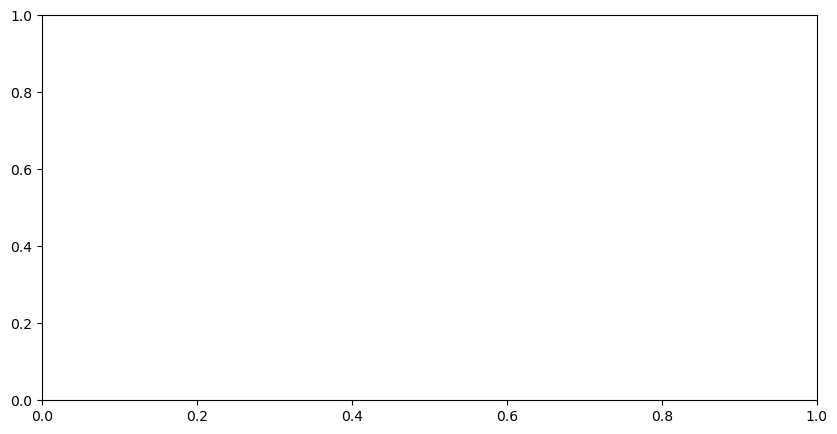

In [41]:
# Convert results to DataFrame for plotting
simulation_df = pd.DataFrame(simulation_results_periods)

# Plotting results
plt.figure(figsize=(10, 5))
simulation_df.boxplot()
plt.title('Monte Carlo Simulation Outcomes for Different Investment Periods')
plt.xlabel('Investment Period (Days)')
plt.ylabel('Projected Investment Value')
plt.show()

In [43]:
# Ensure mean and standard deviation are correctly defined
if 'Daily Returns' not in fx_data.columns:
    fx_data['Daily Returns'] = fx_data['Close/Last'].pct_change().fillna(0)

mean_return = fx_data['Daily Returns'].mean()
std_dev_return = fx_data['Daily Returns'].std()

# Test a simplified Monte Carlo simulation for one period (e.g., 3 months or 63 trading days)
test_days = 63  # 3 months * 21 days
test_simulations = []
np.random.seed(42)  # For reproducibility

for _ in range(100):  # Reduced number of simulations for testing
    daily_changes = np.random.normal(mean_return, std_dev_return, test_days)
    cumulative_return = (1 + daily_changes).cumprod()[-1]  # Calculate cumulative return
    final_value = initial_investment * cumulative_return
    test_simulations.append(final_value)

# Check if the test simulations run correctly
test_simulations[:5]  # Display the first 5 simulated values to check

[23915.038920230945,
 25500.06688839305,
 25274.311310968107,
 25455.73076699806,
 25499.157482704195]

In [45]:
# Calculate daily returns
data['Daily Returns'] = data['Close/Last'].pct_change().fillna(0)

# Calculate the mean and standard deviation of daily returns
mean_return = data['Daily Returns'].mean()
std_dev_return = data['Daily Returns'].std()

# Setup for Monte Carlo simulation
initial_investment = 25000
months = [3, 6, 12, 24, 36]
trading_days = [m * 21 for m in months]  # Trading days per month

simulation_results_periods = {}
np.random.seed(42)

for days in trading_days:
    period_simulations = []
    for _ in range(1000):  # 1000 simulations for robust results
        daily_changes = np.random.normal(mean_return, std_dev_return, days)
        cumulative_return = np.cumprod(1 + daily_changes)[-1]
        final_value = initial_investment * cumulative_return
        period_simulations.append(final_value)
    simulation_results_periods[days] = period_simulations

# Convert results to DataFrame for plotting
simulation_df = pd.DataFrame(simulation_results_periods)

# Plotting results
plt.figure(figsize=(10, 5))
simulation_df.boxplot()
plt.title('Monte Carlo Simulation Outcomes for Different Investment Periods')
plt.xlabel('Investment Period (Days)')
plt.ylabel('Projected Investment Value')
plt.show()

NameError: name 'data' is not defined

In [47]:
# Ensure mean and standard deviation are correctly defined
if 'Daily Returns' not in fx_data.columns:
    fx_data['Daily Returns'] = fx_data['Close/Last'].pct_change().fillna(0)

mean_return = fx_data['Daily Returns'].mean()
std_dev_return = fx_data['Daily Returns'].std()

# Test a simplified Monte Carlo simulation for one period (e.g., 3 months or 63 trading days)
test_days = 63  # 3 months * 21 days
test_simulations = []
np.random.seed(42)  # For reproducibility

for _ in range(100):  # Reduced number of simulations for testing
    daily_changes = np.random.normal(mean_return, std_dev_return, test_days)
    cumulative_return = (1 + daily_changes).cumprod()[-1]  # Calculate cumulative return
    final_value = initial_investment * cumulative_return
    test_simulations.append(final_value)

# Check if the test simulations run correctly
test_simulations[:5]  # Display the first 5 simulated values to check

[23915.038920230945,
 25500.06688839305,
 25274.311310968107,
 25455.73076699806,
 25499.157482704195]